<center><img src=img/MScAI_brand.png width=70%></center>

# Week 10 Exercises and Solutions



<img src=img/genart_1.png width=60%>

Recall our exercise on grammars and generative art. Here is the necessary code for generating and rendering an image. You should understand the grammar data structure (dictionary of nested lists) and the `derive_random_str` function and the use of `eval`, but the `meshgrid` is not too important.

### Grammars and generative art

In [9]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [18]:
G = {
    # <expr> is a non-terminal
    # it rewrites to one of four possible productions
    # each production is a list of symbols
    # each symbol is a string
    # each symbol is either a terminal or non-terminal
    "<expr>" : [["(", "<expr>", "<biop>", "<expr>", ")"], 
                ["<uop>", "<expr>"], 
                ["<var>"], 
                ["<const>"]],
    "<biop>" : [["and"], 
                ["or"]],
    "<uop>"  : [["not"]],
    "<var>"  : [["x[0]"], 
                ["x[1]"], 
                ["x[2]"]],
    "<const>": [["True"], 
                ["False"]]
}

def derive_random_str(G, k):
    if k in G: # start is a key in G, so it is a non-terminal
        return " ".join(derive_random_str(G, sym) 
                        # choice(G[k]) gives one of the productions of G[k]
                        # and that production consists of multiple symbols
                        for sym in random.choice(G[k]))
    else: # start is a terminal
        return k

In [91]:
def render(s):
    n = 200
    xs = np.linspace(0, 1, n)
    ys = np.linspace(0, 1, n)
    x, y = np.meshgrid(xs, ys)
    # I'm using a hack here: when generating a random string s,
    # it could be very simple like just "1". That will 
    # eval to give a scalar, which won't work with imshow. 
    # ones_like ensures that our output p has the right shape.
    try:
        p = eval("lambda x, y: np.ones_like(x) * " + s)
        plt.axis('off')
        plt.imshow(p(x, y));
    except:
        print("There was some error, eg exceeded recursion depth")
        print(s)

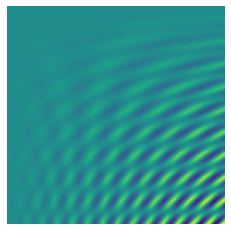

In [92]:
# test with a nice expression s
s = "np.sin(90 * x * y) * np.sin(30 * (y+0.1)) * x * y"
render(s)

**Exercise**: Try altering the grammar `G` so that it returns numerical expressions (like `s` above). See what images they generate using code like below.

**NB**: 

* Our render code expects variables named `x` and `y`, so make sure your grammar emits strings using `x` and `y`, not `x[0]`, `x[1]`, `x[2]`.

* If you want to use `sin`, for example, you have to use `np.sin`.

* Run at least 20 times. If you find a lot of the images are very simple, it's because the expressions are often just a constant or a single variable. Try changing the grammar to encourage it to output more complex expressions. 

* You can also try out different colormaps with `cmap`. 

* Think of some more interesting primitive functions to use other than `*`, `np.sin`, and friends. 

* You can even create more variables (beyond $x$ and $y$), e.g. polar coordinates $r$ and $\theta$.

In [221]:
# a suitable grammar could be:

G = {
    "<expr>" : [["(", "<expr>", "<biop>", "<expr>", ")"],
                ["(", "<expr>", "<biop>", "<expr>", ")"],
                ["<uop>", "<expr>"],
                ["<ufn>", "(", "<expr>", ")"], # allow for sin(<expr>), cos(<expr>), etc
                ["<var>"], 
                ["<const>"]],
    "<biop>" : [["*"], 
                ["+"]],
    "<uop>"  : [["-"]],
    "<ufn>"  : [["np.sin"],
                ["np.cos"],
                ["np.floor"]
               ],
    "<var>"  : [["x"], 
                ["y"]
                ],
    "<const>": [["0.1"], 
                ["1.0"],
                ["10.0"]]
}

np.cos ( ( ( ( - ( - np.floor ( x ) * 1.0 ) + - np.sin ( ( y * np.cos ( - np.sin ( x ) ) ) ) ) + ( - ( ( 10.0 + ( 1.0 + 0.1 ) ) + ( y * 0.1 ) ) * np.cos ( ( 10.0 * x ) ) ) ) * np.cos ( ( np.sin ( 10.0 ) + x ) ) ) )


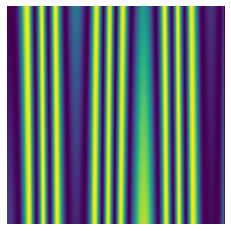

In [228]:
s = derive_random_str(G, "<expr>")
print(s)
render(s)

### `eval` and `exec`

**Exercise**: Can you think of a Python object which is *not* correctly and fully re-created if we write out its `repr` and then read it in and `eval` the result?

**Solution**: E.g. in Scikit-Learn we can recreate a `LogisticRegression` in this way, but if we have `fit()`ted then the internal parameters won't be part of the `repr`. Use `pickle` or similar instead.


**Exercise** (a bit advanced): `exec` doesn't return a value. But there is a simple hack to get access to values calculated inside the `exec`. Can you think of a way to do it? Hint: look at the `exec` function signature, ie what arguments it accepts.

**Solution**: One way is to use:

```python
d = {}
exec(s, d)
```

The execution will happen inside the namespace of `d`. So if your code `s` creates new variables, they'll be saved as elements in `d` and you can read from it after `exec`.

In [6]:
d = {} # d is empty
s = """
x = 0
for i in range(5):
    x += i
"""
exec(s, d)
print(d['x']) # d now contains a value!

10
